In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
titanic_train = pd.read_csv('./train.csv',usecols=["PassengerId","Survived","Sex","Age","Pclass","Fare","Embarked"], engine="python")
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic_train["Age"] = titanic_train["Age"].fillna(30) 
titanic_train["Embarked"] = labelencoder.fit_transform(titanic_train["Embarked"].values)
titanic_train["Sex"] = labelencoder.fit_transform(titanic_train["Sex"].values)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.53      0.62        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



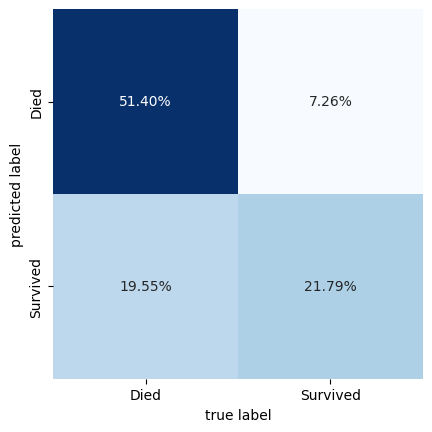

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


x = np.array(titanic_train[["Pclass", "Sex", "Age", "Fare","Embarked"]]).reshape((-1, 5))
y = np.array(titanic_train["Survived"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


modelMNB = MultinomialNB()
modelMNB.fit(x_train,y_train)
cf_matrix = confusion_matrix(y_test, modelMNB.predict(x_test))
print(classification_report(y_test,modelMNB.predict(x_test)))

sns.heatmap(cf_matrix/np.sum(cf_matrix), square=True, annot=True, fmt='.2%', cmap='Blues', cbar=False, xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel('true label')
plt.ylabel('predicted label');

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



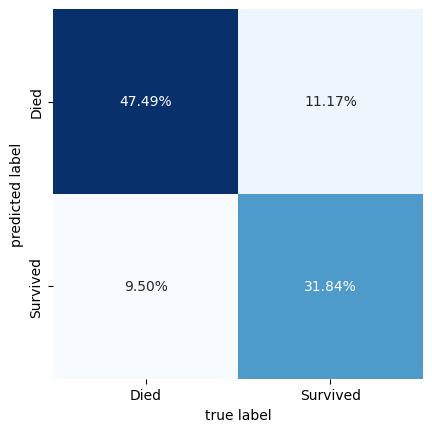

In [5]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()
modelGNB.fit(x_train,y_train)
cf_matrix = confusion_matrix(y_test, modelGNB.predict(x_test))
print(classification_report(y_test,modelGNB.predict(x_test)))

sns.heatmap(cf_matrix/np.sum(cf_matrix), square=True, annot=True, fmt='.2%', cmap='Blues', cbar=False, xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel('true label')
plt.ylabel('predicted label');

C =  1 , accuracy =  0.6536312849162011
C =  10 , accuracy =  0.6759776536312849
C =  100.0 , accuracy =  0.776536312849162
C =  1000.0 , accuracy =  0.7877094972067039
C =  10000.0 , accuracy =  0.7597765363128491
C =  100000.0 , accuracy =  0.7653631284916201
1000.0
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



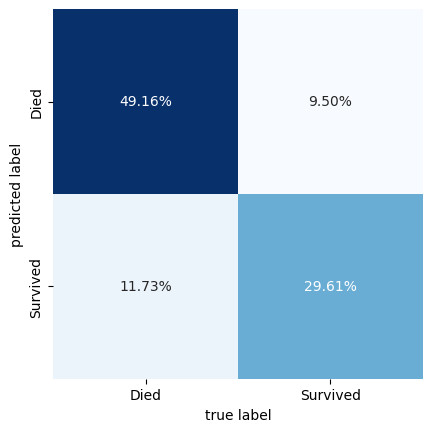

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


x = np.array(titanic_train[["Sex", "Age", "Fare","Embarked"]]).reshape((-1, 4))
y = np.array(titanic_train["Survived"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


best_accuracy = 0
best_C = 0
for C in [1,10,1e2,1e3,1e4,1e5]:
    modelSVC = SVC(kernel='rbf', C=C).fit(x_train, y_train)
    temp = accuracy_score(y_test,modelSVC.predict(x_test))
    print("C = ", C ,", accuracy = ",accuracy_score(y_test,modelSVC.predict(x_test)))
    if best_accuracy < temp:
        best_accuracy = temp
        best_C = C
        
print(best_C)

modelSVC = SVC(kernel='rbf',C=best_C)
modelSVC = modelSVC.fit(x_train,y_train)

cf_matrix = confusion_matrix(y_test, modelSVC.predict(x_test))
print(classification_report(y_test,modelSVC.predict(x_test)))

sns.heatmap(cf_matrix/np.sum(cf_matrix), square=True, annot=True, fmt='.2%', cmap='Blues', cbar=False, xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])

plt.xlabel('true label')
plt.ylabel('predicted label');